In [3]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from pathlib import Path
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Input

In [4]:
os.walk('../FINAL/Assignment 1/TMN')

<generator object _walk at 0x000001B4764CA2D0>

In [5]:
root, folder, file = next(os.walk('TMN'))
print("Root:", root)
print("Folders:", folder)
print("Files:", file)

Root: TMN
Folders: ['Maahi', 'Mostafijur', 'Nura', 'Tauhid']
Files: []


In [ ]:
folders = []
img_data =[]
labels =[]
persons=[]

i = 0
for root, dirs, files in os.walk('TMN'):
    i += 1
    if( i== 1):
        folders = dirs
        print('i : ', i)
        print("Root:", root)
        
    else:
        j = 0
        print("-----------------------------------------------------------")
        for file_name in files:
            j +=1
            img_path = os.path.join(Path(root), file_name)
            person = folders[i-2]
            label = i-2
            img_data.append(img_path)
            persons.append(person)
            labels.append(label)
            if( j <= 2):
                print('i : ', i)
                print("Image Path:", img_path)
                print("Person : ", person)
                print("Label:", label)


i :  1
Root: TMN
-----------------------------------------------------------
i :  2
Image Path: TMN\Maahi\Maahi_00001.jpg
Person :  Maahi
Label: 0
i :  2
Image Path: TMN\Maahi\Maahi_00007.jpg
Person :  Maahi
Label: 0
-----------------------------------------------------------
i :  3
Image Path: TMN\Mostafijur\Mostafij_10.jpg
Person :  Mostafijur
Label: 1
i :  3
Image Path: TMN\Mostafijur\Mostafij_100.jpg
Person :  Mostafijur
Label: 1
-----------------------------------------------------------
i :  4
Image Path: TMN\Nura\nura_1.jpg
Person :  Nura
Label: 2
i :  4
Image Path: TMN\Nura\Nura_10.jpg
Person :  Nura
Label: 2
-----------------------------------------------------------
i :  5
Image Path: TMN\Tauhid\tauhid_1.jpg
Person :  Tauhid
Label: 3
i :  5
Image Path: TMN\Tauhid\tauhid_10.jpg
Person :  Tauhid
Label: 3


In [7]:
len(img_data), len(labels), len(persons)

(822, 822, 822)

In [8]:
full_dataset = list(zip(img_data, labels, persons))
random.shuffle(full_dataset)

In [10]:
img_oath, label, _ = full_dataset[0]
print("First Image Path:", img_oath)
print("First Label:", label)

First Image Path: TMN\Tauhid\tauhid_243.jpg
First Label: 3


In [11]:
img_size = (224, 224)

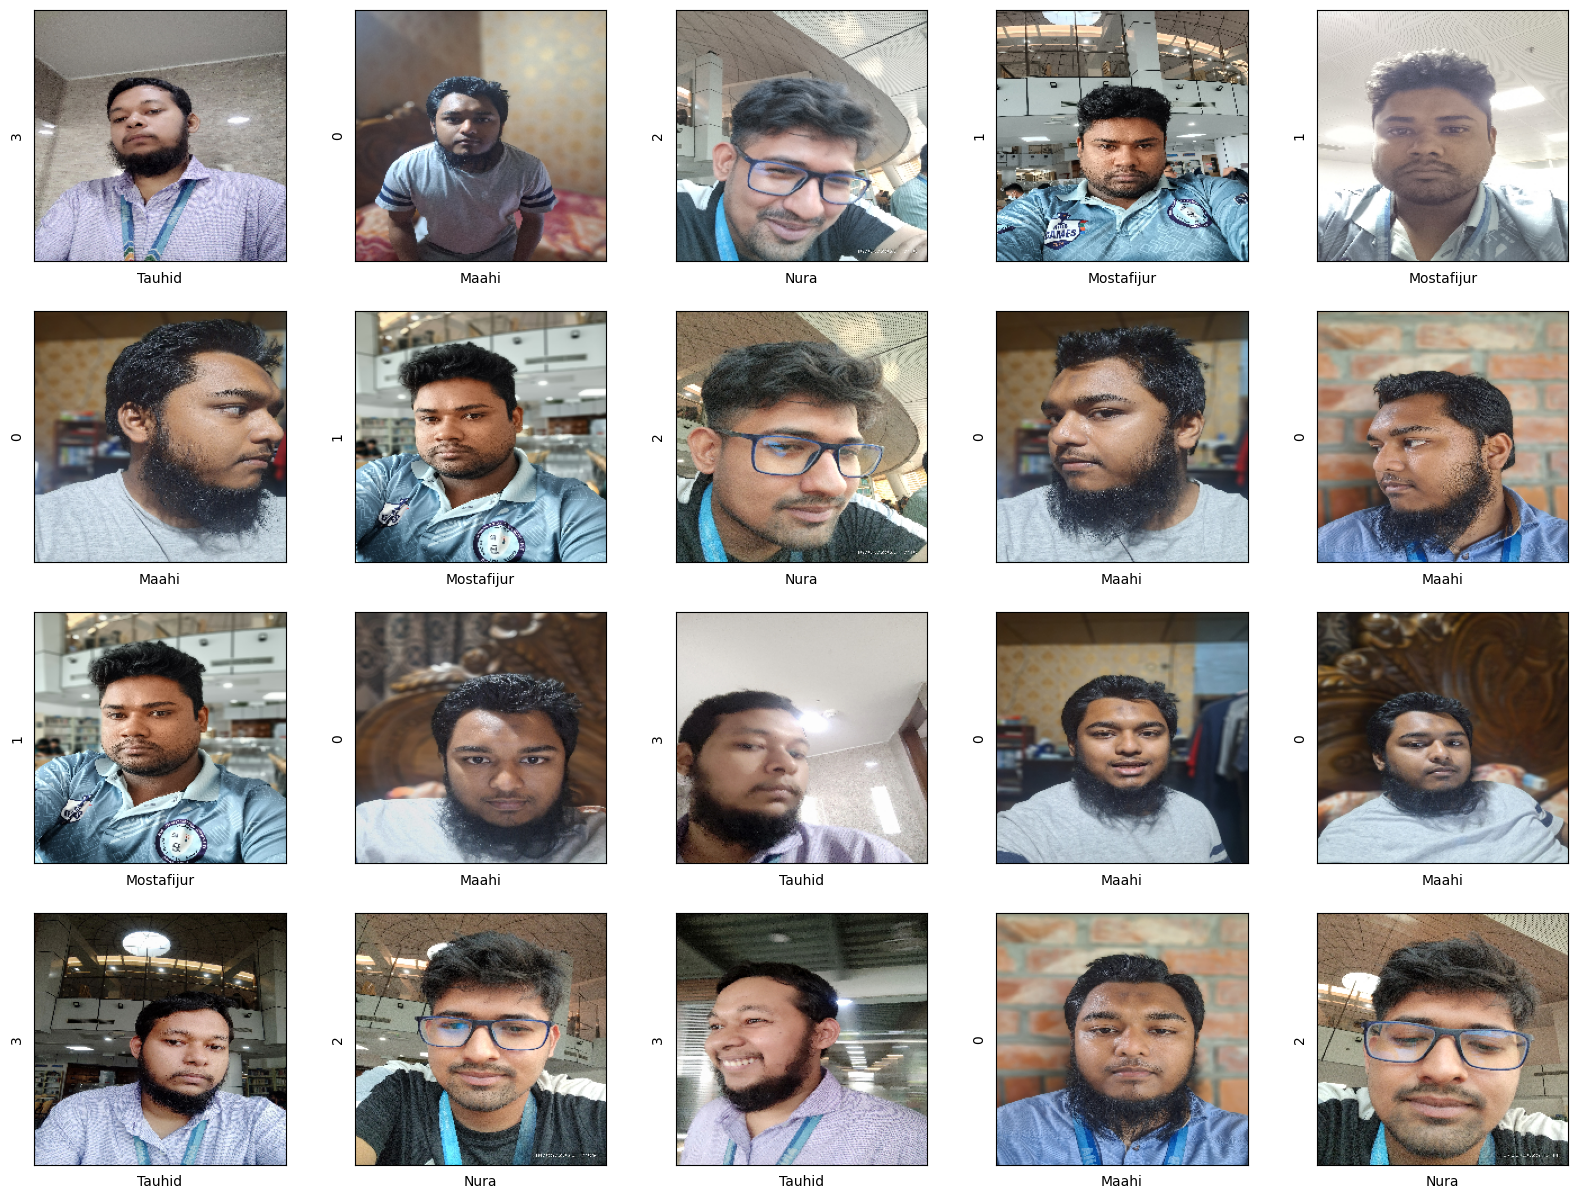

In [12]:
i = 0
plt.figure(figsize=(20,15))

for i in range(20):
    img_path, label, person = full_dataset[i]
    img_data = cv2.imread(img_path)
    img_data = cv2.resize(img_data, img_size)
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
    plt.ylabel(label)
    plt.xlabel(person)
    plt.xticks([])
    plt.yticks([])
plt.show()
    


In [13]:
img, label,_ =full_dataset[0]
print(img, label)

TMN\Tauhid\tauhid_243.jpg 3


In [14]:
X_train = []
Y_train=[]
X_test=[]
Y_test=[]
for i in range(len(full_dataset)):
    x = round(len(full_dataset)* 0.8)
    img, label, _ = full_dataset[i]
    if( i < x):
        img_data = cv2.imread(img)
        img_data = cv2.resize(img_data, img_size)
        X_train.append(img_data)
        Y_train.append(label)
    
    else:
        img_data = cv2.imread(img)
        img_data = cv2.resize(img_data, img_size)
        X_test.append(img_data)
        Y_test.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
Y_train = np.reshape(Y_train, (-1,1))

X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test = np.reshape(Y_test, (-1,1))

print("Traning image shape: ", X_train.shape)
print("Traning label shape: ", Y_train.shape)
print("Test image shape: ", X_test.shape)
print("Test label shape: ", Y_test.shape)


Traning image shape:  (658, 224, 224, 3)
Traning label shape:  (658, 1)
Test image shape:  (164, 224, 224, 3)
Test label shape:  (164, 1)


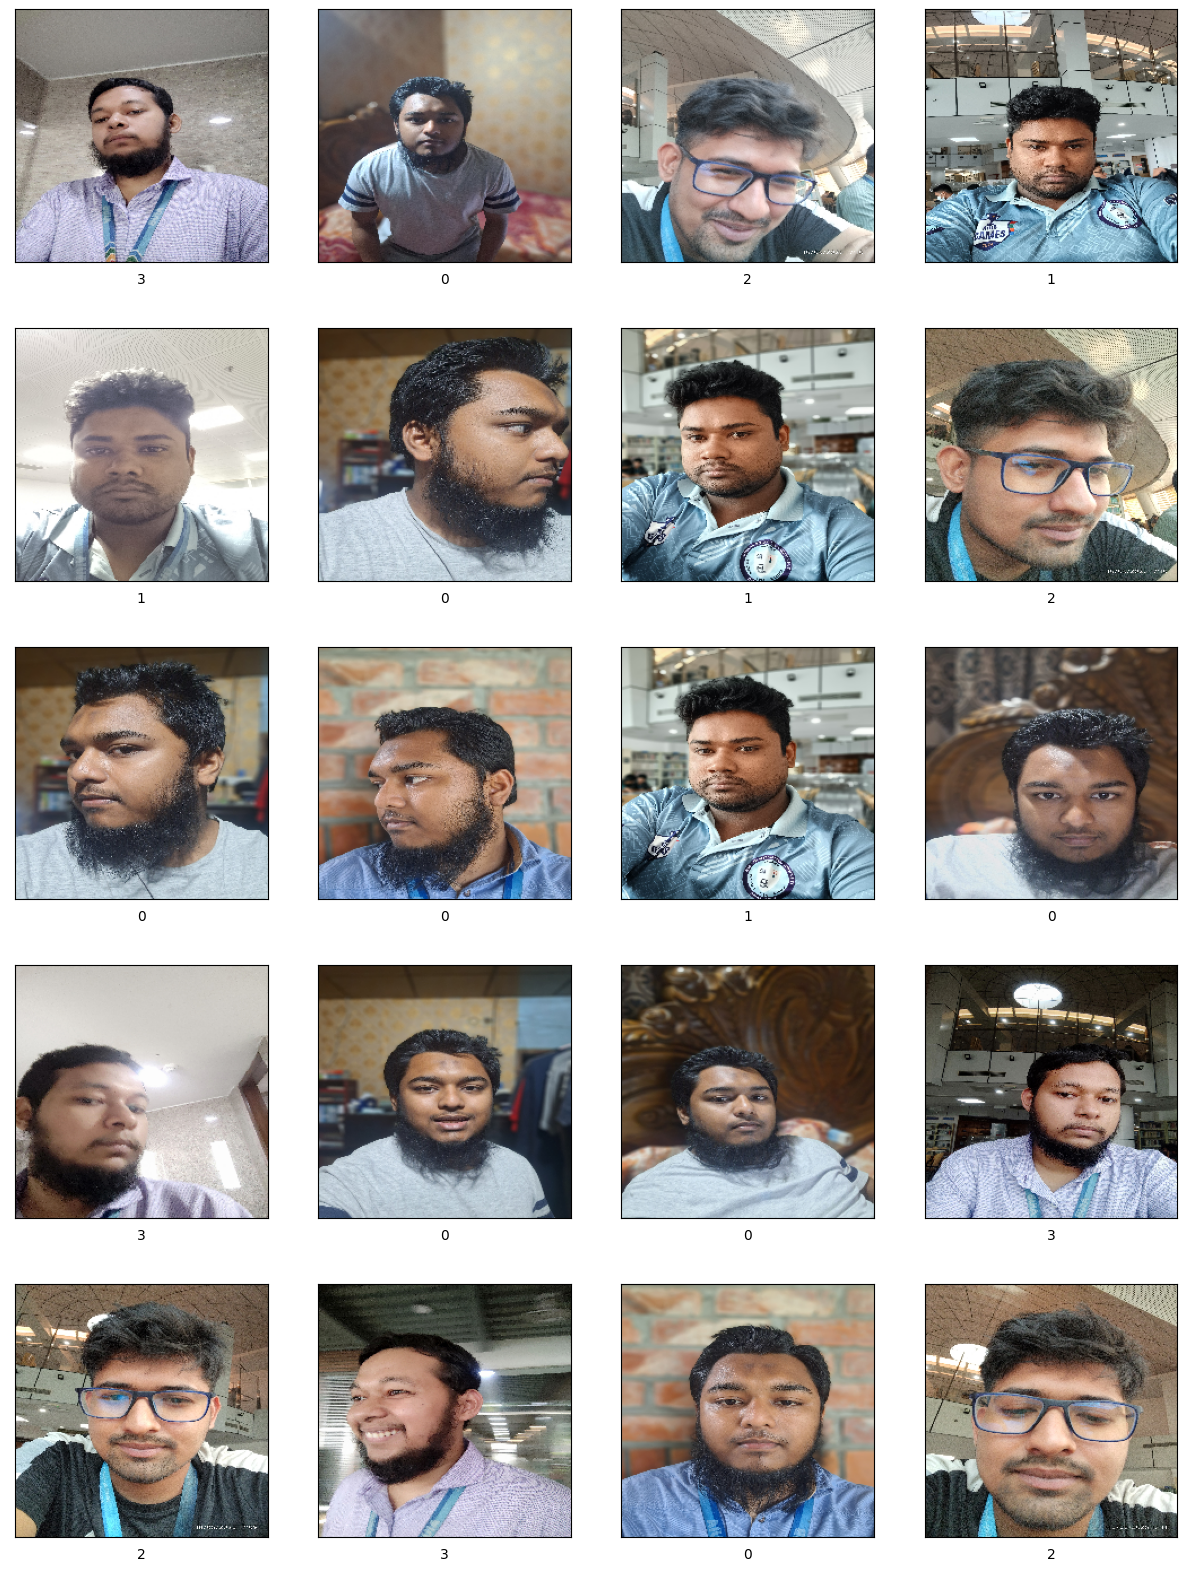

In [15]:
j= 0
plt.figure(figsize=(15,20))
for i in range(20):
    plt.subplot(5, 4,i+1)
    img = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(Y_train[i][0])

In [16]:
img_shape = img_size + (3, )
img_shape

(224, 224, 3)

In [17]:


# Define input shape
input_shape = X_train.shape[1:]


# Load base model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

# Freeze base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)  # Replace 4 with your number of classes

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [19]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,           
    restore_best_weights=True  
)

h = model.fit(
    x=X_train,
    y=Y_train,
    epochs=30,
    validation_split=0.2,
    batch_size=16 ,
)


Epoch 1/30
33/33 [==============================] - 10s 94ms/step - loss: 2.9630 - accuracy: 0.4791 - val_loss: 2.0493 - val_accuracy: 0.7424
Epoch 2/30
33/33 [==============================] - 1s 38ms/step - loss: 1.8476 - accuracy: 0.7643 - val_loss: 1.8045 - val_accuracy: 0.7121
Epoch 3/30
33/33 [==============================] - 1s 38ms/step - loss: 1.4893 - accuracy: 0.8498 - val_loss: 1.3109 - val_accuracy: 0.9015
Epoch 4/30
33/33 [==============================] - 1s 37ms/step - loss: 1.2358 - accuracy: 0.9163 - val_loss: 1.2068 - val_accuracy: 0.9167
Epoch 5/30
33/33 [==============================] - 1s 38ms/step - loss: 1.1655 - accuracy: 0.8935 - val_loss: 1.1731 - val_accuracy: 0.8939
Epoch 6/30
33/33 [==============================] - 1s 38ms/step - loss: 1.0786 - accuracy: 0.9068 - val_loss: 1.0276 - val_accuracy: 0.9242
Epoch 7/30
33/33 [==============================] - 1s 37ms/step - loss: 0.9444 - accuracy: 0.9316 - val_loss: 0.9816 - val_accuracy: 0.9091
Epoch 8/30
3

In [21]:
train_loss = h.history['loss']
val_loss = h.history['val_loss']
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

In [22]:
epoch = range(1, len(val_acc)+1)
epoch

range(1, 31)

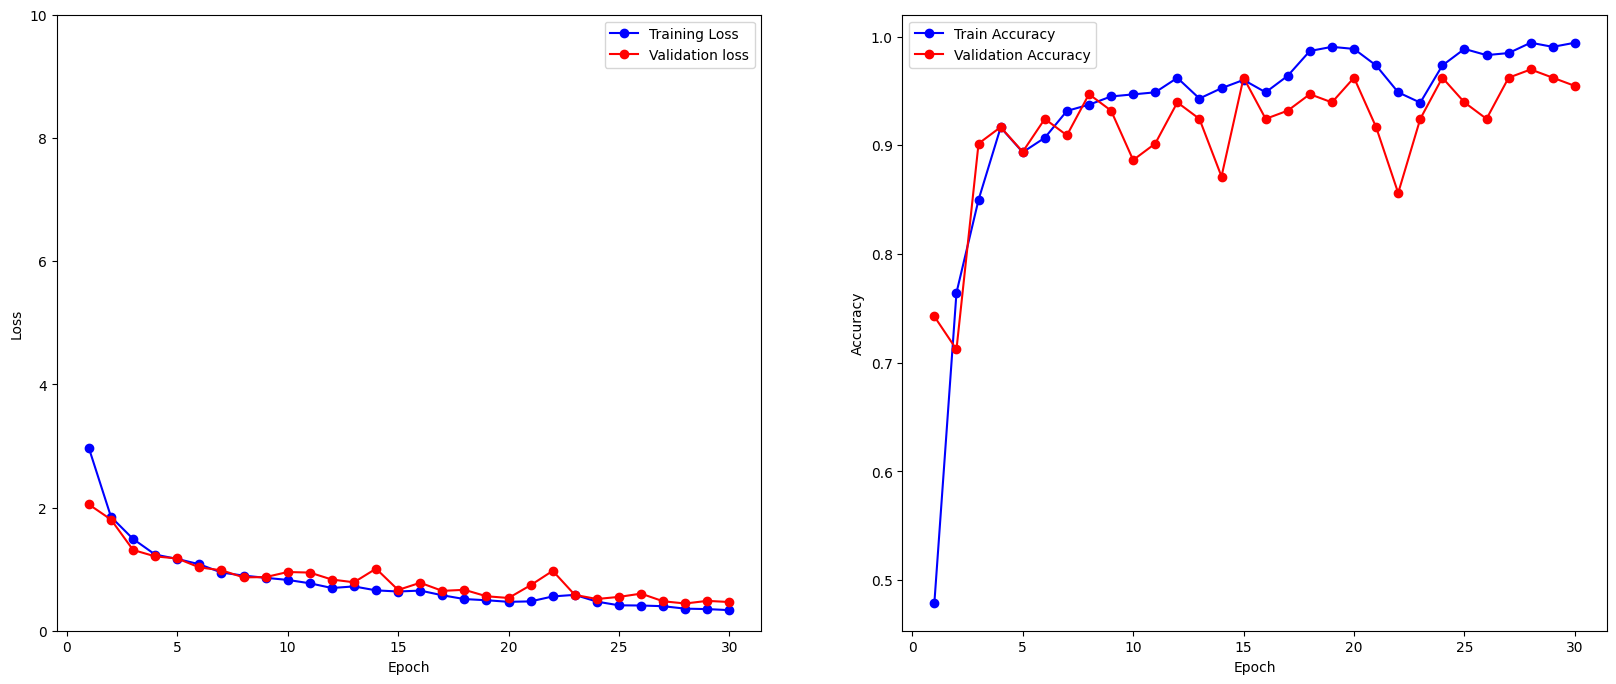

In [23]:
epoch = range(1, len(val_acc)+1)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epoch, train_loss,'bo-', label='Training Loss')
plt.plot(epoch, val_loss,'ro-', label= 'Validation loss')
plt.ylim(0,10)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_acc,'bo-', label='Train Accuracy')
plt.plot(epoch, val_acc,'ro-', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

6/6 [==============================] - 1s 44ms/step - loss: 0.4105 - accuracy: 0.9573

Test Accuracy: 0.957317054271698

Test Loss: 0.4105475842952728


In [25]:
probability = model.predict(X_test)

6/6 [==============================] - 1s 52ms/step


In [26]:
(probability[0].max() *100).round(2)

100.0

In [27]:
predicted_classes = probability[0].argmax()
predicted_classes

1

In [28]:
probability[0]

array([1.5350558e-06, 9.9999809e-01, 2.6545135e-07, 1.1992842e-07],
      dtype=float32)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


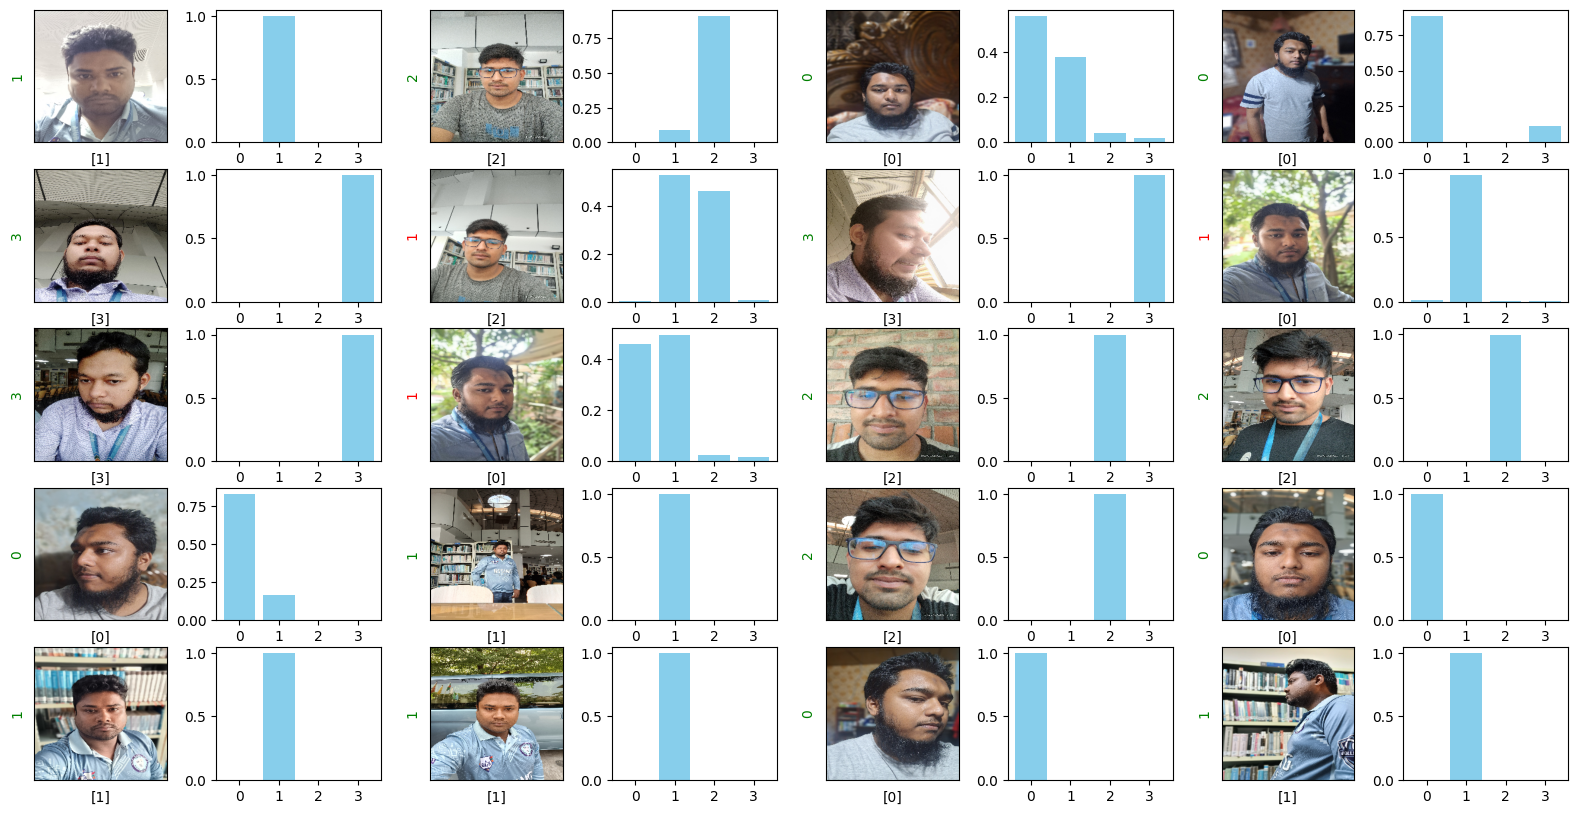

In [29]:
c=0
label=[0,1,2,3]
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,8,c+1)
    img = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xlabel(Y_test[i])
    if(Y_test[i] == probability[i].argmax()):
        plt.ylabel(probability[i].argmax(), color='g')
    else:
        plt.ylabel(probability[i].argmax(), color='r')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5,8,c+2)
    plt.bar(range(len(probability[i])), probability[i], color='skyblue')
    plt.xticks(range(len(label)), label)
    c+=2
plt.show()
    

In [30]:
probability[0]

array([1.5350558e-06, 9.9999809e-01, 2.6545135e-07, 1.1992842e-07],
      dtype=float32)

In [31]:
model.save("model_MobileNet(19_5_1_1).h5")

In [33]:
# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:  # Adjust the number of layers to unfreeze
    layer.trainable = True

# Compile the model again with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine_tune = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('model_MobileNet(19_5_1_1).h5', save_best_only=True, monitor='val_loss'),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)
    ]
)



Epoch 1/10
17/17 [==============================] - 10s 162ms/step - loss: 1.2795 - accuracy: 0.6749 - val_loss: 0.5893 - val_accuracy: 0.9318 - lr: 1.0000e-05
Epoch 2/10
17/17 [==============================] - 1s 77ms/step - loss: 0.9496 - accuracy: 0.7719 - val_loss: 0.6942 - val_accuracy: 0.9167 - lr: 1.0000e-05
Epoch 3/10
17/17 [==============================] - 1s 77ms/step - loss: 0.6812 - accuracy: 0.8498 - val_loss: 0.6913 - val_accuracy: 0.9091 - lr: 1.0000e-05
Epoch 4/10
16/17 [===========================>..] - ETA: 0s - loss: 0.6243 - accuracy: 0.8789
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
17/17 [==============================] - 1s 77ms/step - loss: 0.6261 - accuracy: 0.8783 - val_loss: 0.6827 - val_accuracy: 0.9091 - lr: 1.0000e-05
Epoch 5/10
17/17 [==============================] - 1s 78ms/step - loss: 0.5337 - accuracy: 0.9183 - val_loss: 0.6692 - val_accuracy: 0.9091 - lr: 5.0000e-06
Epoch 6/10
17/17 [==============================]